In [1]:
def readFile( filename ):
    f = open( filename )
    text = f.read()
    f.close()
    return text

def writeFile( filename, text ):
    f = open( filename, "w" )
    f.write( text )
    f.close()

def filterText( text ):
    
    output = ""
    wasSpace = False
    
    for ch in text.upper():
            
        if ch >= 'A' and ch <= 'Z':
        
            # je to zaciatok dalsieho slova?
            if wasSpace:
                output = output + " "
                wasSpace= False;

            output = output + ch
            
        else:
            wasSpace = True;
    
    return output

In [2]:
message = readFile('TXT/spolu_ascii.txt')
print(message[:500])

Uvod
V dnesnom svete technologie napreduju kazdym dnom coraz rychlejsie. Toto sa tyka aj
webovych aplikacii. V sucasnosti si uz aj bezny uzivatel webovych aplikacii dokaze vsimnut,
ze sa nespravaju jednotlive webove aplikacie rovnako, ale rozdielne. Pri niektorych webovych
aplikaciach sa po prekliknuti na hypertextovy odkaz nacita cela stranka, pri inych sa zobrazi
iba notifikacny obrazok nahravania (loader) a nacita sa len cast stranky. Pri dalsich webovych
aplikaciach sa moze stat, ze ked uziv


In [3]:
message = filterText(message)
print(message[:500])

UVOD V DNESNOM SVETE TECHNOLOGIE NAPREDUJU KAZDYM DNOM CORAZ RYCHLEJSIE TOTO SA TYKA AJ WEBOVYCH APLIKACII V SUCASNOSTI SI UZ AJ BEZNY UZIVATEL WEBOVYCH APLIKACII DOKAZE VSIMNUT ZE SA NESPRAVAJU JEDNOTLIVE WEBOVE APLIKACIE ROVNAKO ALE ROZDIELNE PRI NIEKTORYCH WEBOVYCH APLIKACIACH SA PO PREKLIKNUTI NA HYPERTEXTOVY ODKAZ NACITA CELA STRANKA PRI INYCH SA ZOBRAZI IBA NOTIFIKACNY OBRAZOK NAHRAVANIA LOADER A NACITA SA LEN CAST STRANKY PRI DALSICH WEBOVYCH APLIKACIACH SA MOZE STAT ZE KED UZIVATEL STLAC


In [4]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "

def countChars(message):
    msg = message.upper()
    multiplicities = [ msg.count(i) for i in alphabet ]
    return multiplicities

def getProbabilities(message):
    multiplicities = countChars(message)
    total = sum(multiplicities)
    probabilities = [ float(n) / float(total) for n in multiplicities ]
    return probabilities

def printProbabilities(probabilities):
    for i in range(0, len(alphabet)):
        print("%c\t%.4f" % (alphabet[i], probabilities[i]))

In [5]:
print(countChars(message))

[508338, 75505, 149015, 158310, 407599, 19213, 18274, 119692, 313009, 79648, 161369, 215884, 161827, 273597, 441790, 149340, 1338, 240567, 244333, 254847, 162514, 198028, 4531, 5174, 122648, 134933, 889419]


In [6]:
probabilities = getProbabilities(message)
printProbabilities(probabilities)

A	0.0922
B	0.0137
C	0.0270
D	0.0287
E	0.0740
F	0.0035
G	0.0033
H	0.0217
I	0.0568
J	0.0145
K	0.0293
L	0.0392
M	0.0294
N	0.0496
O	0.0802
P	0.0271
Q	0.0002
R	0.0437
S	0.0443
T	0.0462
U	0.0295
V	0.0359
W	0.0008
X	0.0009
Y	0.0223
Z	0.0245
 	0.1614


In [7]:
def sortProbabilities(probabilities):
    array = []
    for i in range(0, len(alphabet)):
        tuple = (probabilities[i], alphabet[i])
        array.append(tuple)
    array.sort(reverse=True)
    return array

In [8]:
print(sortProbabilities(probabilities))

[(0.16139732181256172, ' '), (0.09224492817845582, 'A'), (0.08016887743973497, 'O'), (0.0739644497964158, 'E'), (0.056799792115109, 'I'), (0.04964794214644779, 'N'), (0.046245496522972766, 'T'), (0.04433758648109456, 'S'), (0.04365419393613419, 'R'), (0.03917512378550837, 'L'), (0.03593490676936064, 'V'), (0.02949040256284907, 'U'), (0.029365736955204943, 'M'), (0.02928262655010886, 'K'), (0.028727528888124323, 'D'), (0.02709979890185387, 'P'), (0.027040823177713637, 'C'), (0.024485450416658953, 'Z'), (0.022256168044158118, 'Y'), (0.02171976115013187, 'H'), (0.014453226080988731, 'J'), (0.01370142169602569, 'B'), (0.003486463347404034, 'F'), (0.0033160688705804048, 'G'), (0.0009388935283125212, 'X'), (0.0008222123263981511, 'W'), (0.0002427985196911777, 'Q')]


In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def showProbabilities(probabilities):
    index = np.arange(len(alphabet))
    yy = [y for y in probabilities]
    plt.bar(index, yy, 0.8)
    plt.xticks(index, [letter for letter in alphabet])
    plt.title('Probabilities')
    plt.show()

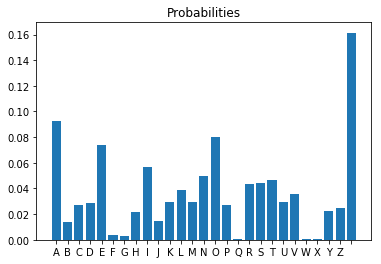

In [10]:
showProbabilities(probabilities)

In [11]:
def spocitajVyskyt(text, pocetZnakov=2):
    pocetnosti = {}
    for i in range(len(text)-pocetZnakov):
        s = text[i:i+pocetZnakov]
        pocetnosti[s] = pocetnosti.get(s, 0) + 1
    return pocetnosti

def spocitajDvojice(text):
    pocet = {}
    for i in range(len(text)-1):
        s = text[i:i+2]
        pocet[s] = pocet.get(s, 0) + 1
    return pocet

In [12]:
dvojice = spocitajDvojice(message)
print(sorted(dvojice.items(), key=lambda it: it[1], reverse=True))

[('A ', 157486), ('E ', 126020), (' S', 108486), (' P', 96147), ('O ', 89498), ('I ', 76107), (' N', 72537), (' V', 71297), (' A', 67569), ('U ', 61446), ('Y ', 61109), ('ST', 60919), ('NA', 60901), ('NE', 59957), (' Z', 57339), ('OV', 55247), ('AL', 53576), (' T', 51406), ('PO', 50774), ('PR', 49548), ('TO', 49043), ('L ', 47505), ('M ', 46848), ('RA', 44459), ('IE', 43384), ('LA', 43188), (' M', 42799), ('CH', 42256), ('NI', 42045), ('RE', 39942), ('EN', 39848), (' K', 39505), ('VA', 39402), ('RO', 38616), ('KO', 37526), (' D', 37157), ('HO', 36789), ('RI', 36542), (' O', 36390), ('TA', 35638), ('TE', 34632), ('SA', 34058), ('ED', 33977), ('T ', 33795), ('OM', 33474), ('AN', 33463), ('AT', 32098), ('LI', 31945), ('OR', 31909), (' H', 31780), ('CI', 31556), ('VE', 31531), (' C', 31006), ('LE', 30514), ('OD', 30409), ('TI', 29481), ('AK', 28733), ('NO', 28252), ('DO', 27656), ('ZA', 27532), ('SI', 27259), ('OL', 27157), ('EL', 26643), ('V ', 26536), ('ER', 26082), ('LO', 26025), ('AC',

In [13]:
def spocitajTrojice(text):
    pocet = {}
    for i in range(len(text)-2):
        s = text[i:i+3]
        pocet[s] = pocet.get(s, 0) + 1
    return pocet

In [14]:
trojice = spocitajTrojice(message)

In [15]:
len(trojice)

9020

In [16]:
27**3

19683

In [17]:
def spocitajStvorice(text):
    pocet = {}
    for i in range(len(text)-3):
        s = text[i:i+4]
        pocet[s] = pocet.get(s, 0) + 1
    return pocet

In [18]:
stvorice = spocitajStvorice(message)

In [19]:
print(len(stvorice))

58637


In [20]:
len(stvorice)/27**4

0.11033586042476963

In [21]:
def spocitajPatice(text):
    pocet = {}
    for i in range(len(text)-4):
        s = text[i:i+5]
        pocet[s] = pocet.get(s, 0) + 1
    return pocet

patice = spocitajPatice(message)
print(len(patice))

233229


In [22]:
from math import log

def spocitajEntropiu(ntice):
    entropy = 0.0
    n = sum(ntice.values())
    for i in ntice.values():
        p = i / n
        entropy = entropy - p * log(p, 2)
    return entropy

In [23]:
print(spocitajEntropiu(dvojice))
print(spocitajEntropiu(trojice))
print(spocitajEntropiu(stvorice))
print(spocitajEntropiu(patice))
print(spocitajEntropiu(trojice)-spocitajEntropiu(dvojice))
print(spocitajEntropiu(stvorice)-spocitajEntropiu(trojice))
print(spocitajEntropiu(patice)-spocitajEntropiu(stvorice))


7.757263355442856
10.842667119297145
13.37433736326111
15.452749922345593
3.0854037638542895
2.5316702439639656
2.078412559084482


In [24]:
for i in range(2,20):
    ntice = spocitajVyskyt(message, i)
    print(i,len(ntice),spocitajEntropiu(ntice))

2 691 7.757263338412117
3 9020 10.842667208090251
4 58637 13.374337713217786
5 233229 15.452750487797122
6 657663 17.18697916361552
7 1333423 18.57529504906668
8 2088772 19.620975950802507
9 2781342 20.380628967270322
10 3362185 20.924202188174117
11 3824199 21.308417822930004
12 4178777 21.577090845162353
13 4444206 21.764010725482514
14 4641273 21.895568692490592
15 4788265 21.989385595087906
16 4899030 22.057964724498458
17 4983992 22.109332096317477
18 5049965 22.148863251066928
19 5101992 22.17985182841475


In [25]:
xx = [item for item in dvojice.items() if item[0].startswith('B')]
print(sorted(xx, key=lambda it: it[1], reverse=True))

[('BO', 14953), ('BY', 10992), ('BA', 7963), ('BU', 7912), ('BE', 6855), ('BR', 6661), ('BL', 5510), ('BI', 4948), ('BN', 2403), ('B ', 2271), ('BS', 1039), ('BJ', 924), ('BD', 720), ('BC', 674), ('BB', 474), ('BZ', 293), ('BT', 221), ('BK', 217), ('BM', 215), ('BV', 165), ('BH', 49), ('BP', 17), ('BG', 16), ('BW', 12), ('BX', 1)]


In [26]:
yy = [item for item in trojice.items() if item[0].startswith('BO')]
print(sorted(yy, key=lambda it: it[1], reverse=True))

[('BOL', 7228), ('BO ', 2435), ('BOR', 1029), ('BOV', 732), ('BOU', 554), ('BOD', 549), ('BOJ', 397), ('BOK', 381), ('BOM', 368), ('BOC', 283), ('BOH', 272), ('BOZ', 243), ('BOT', 184), ('BOO', 139), ('BOS', 60), ('BON', 44), ('BOI', 12), ('BOP', 11), ('BOX', 10), ('BOG', 7), ('BOY', 6), ('BOA', 3), ('BOB', 3), ('BOE', 2), ('BOW', 1)]


In [27]:
def getIndexOfCoincidence(message):
    multiplicities = countChars(message)
    n = sum(multiplicities)
    return float(sum([ ni * (ni-1) for ni in multiplicities ])) / float((n * (n - 1)))

In [28]:
print(getIndexOfCoincidence(message))

0.06785153438951882


In [29]:
def ctoi( c ):
    return ord(c) - 65

def itoc( i ):
    return chr(i + 65)

def caesarEncrypt( plainText, key ):
    output = ""
    for ch in plainText.upper():
        if ch >= 'A' and ch <= 'Z':
            output = output + itoc( (ctoi(ch) + key) % 26 )
        else:
            output = output + ch
    return output

def caesarDecrypt( cipherText, key ):
    decipherKey = 26 - key
    return caesarEncrypt( cipherText, decipherKey)

In [30]:
encrypted = filterText(readFile('TXT/viegenere_encrypted.txt'))
print(encrypted)

DNUWQDFQPTAEAHYHGEOSOONRBAFSJRJKTBSCARWLKEHAAGRQSWZWJHYHNCSEACLWDFLZACMHCTZWUKVUTTZSPCMHGBSCARKKTCJMOHJZTRWLKCYDGDLGAOKVDSZWOOPVIOZWNRRXVHLWNRRUIEJKWMJVWEHMPMFXIHWEPVVUTPAWOCEWWEKZAZWDCDDWWJVHBTZWNSROXTLDAOEGIHWQHZTRBESYWWEVWEEWWBKBDUCFKKKKTCJMOHNRJLVYAHJRUTTMPHYHVIJDOVVVPYKLKVVUHEDXSSCOXFLZAMCOROEWWURLCIDDAOKHBNGOWBUVWEKWPHFZDRCSJRRWTEESHZWLGSLSJRCDHTOWHZTRBEKMLDVUIIEWPVVZDMSFOOZGVOQGQOEGVELGJSFWWEELDSIHEIWKERRUTSSQPVVBKEUGISRJPIFFKKKKTGAJHKVQIAFVOVVODOCWZOEGIHWJAKRVCOLZEBXEJTLZARZVWEKKKPRFZSZWYODHPNVKWMJVWEFGKHYHNAAFPQFPTAYSEBERIOFWKTVPHAQKPVVPDTZWNBFWDNWGBSDVPYKKDSNHALUGISRJPIFGNBFWROEWWURLCSSAZHYHLOESJWCOWANWKBVIDRKMLDVUQULQKITDCTAXPVVBPIFLYCDHHAAVPVVJXRDTQHZFPNKSUGJKTGGQKIRQSBJAJUKKTBWKPCWHBBWKPCIZDRKLOOPVIHWYEFCLKESLASDDALSFZMFXRAFLDOMHDNWLEZCWWALKYCDHPGSAJKVOATZWSCDDCSZWSOJGDNWSJRJKTTGGGVVUHPAFJWEJIOLZARFRGTGKLWEDCDSKOVVVEAFKDSJDCGEQZOIWTRZSWHVIXVWXEJVSXEKLKRRBBYVSNHVUWASLATZYTFANADZHHTGVWMKKTKAFCKRVROEAJUURLNLZAGKUTELSJRYHWESJZVVUHIFYXIKZWALKDSJDCGZWYCLOSNLZAOIVDHWKPCGSTDSFZGRL

In [31]:
print(getIndexOfCoincidence(encrypted))

0.04456591982118284


In [32]:
prob2 = getProbabilities(encrypted)
printProbabilities(prob2)

A	0.0481
B	0.0194
C	0.0329
D	0.0536
E	0.0398
F	0.0330
G	0.0410
H	0.0547
I	0.0363
J	0.0374
K	0.0579
L	0.0498
M	0.0117
N	0.0227
O	0.0410
P	0.0308
Q	0.0193
R	0.0363
S	0.0615
T	0.0351
U	0.0232
V	0.0492
W	0.0805
X	0.0183
Y	0.0230
Z	0.0434
 	0.0000


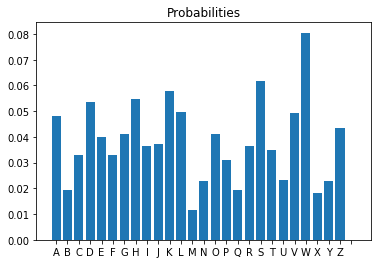

In [33]:
showProbabilities(prob2)

In [34]:
def showProbabilities2(probabilities1, probabilities2):
    index = np.arange(len(alphabet))
    xx = [x for x in alphabet]
    yy1 = [y for y in probabilities1]
    yy2 = [y for y in probabilities2]
    plt.bar(index, yy1, 0.35)
    plt.bar(index + 0.4, yy2, 0.35)
    plt.xticks(index, [letter for letter in alphabet])
    plt.title('Probabilities')
    plt.show()

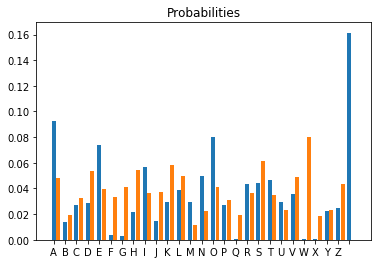

In [35]:
showProbabilities2(probabilities,prob2)

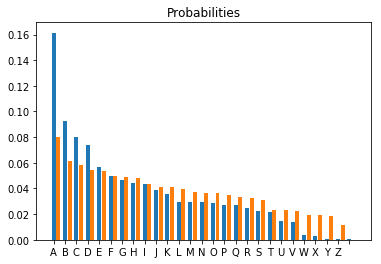

In [36]:
pom1 = probabilities.copy()
pom1.sort(reverse=True)
pom2 = prob2.copy()
pom2.sort(reverse=True)
showProbabilities2(pom1,pom2)

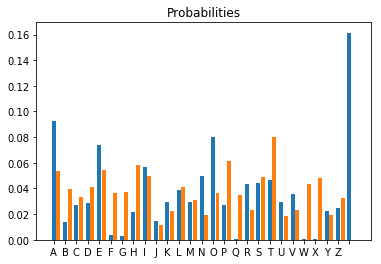

In [37]:
decrypted = caesarDecrypt(encrypted, 3)
prob2 = getProbabilities(decrypted)
showProbabilities2(probabilities,prob2)

In [38]:
print(decrypted)

AKRTNACNMQXBXEVEDBLPLLKOYXCPGOGHQYPZXOTIHBEXXDONPTWTGEVEKZPBXZITACIWXZJEZQWTRHSRQQWPMZJEDYPZXOHHQZGJLEGWQOTIHZVADAIDXLHSAPWTLLMSFLWTKOOUSEITKOORFBGHTJGSTBEJMJCUFETBMSSRQMXTLZBTTBHWXWTAZAATTGSEYQWTKPOLUQIAXLBDFETNEWQOYBPVTTBSTBBTTYHYARZCHHHHQZGJLEKOGISVXEGORQQJMEVESFGALSSSMVHIHSSREBAUPPZLUCIWXJZLOLBTTROIZFAAXLHEYKDLTYRSTBHTMECWAOZPGOOTQBBPEWTIDPIPGOZAEQLTEWQOYBHJIASRFFBTMSSWAJPCLLWDSLNDNLBDSBIDGPCTTBBIAPFEBFTHBOORQPPNMSSYHBRDFPOGMFCCHHHHQDXGEHSNFXCSLSSLALZTWLBDFETGXHOSZLIWBYUBGQIWXOWSTBHHHMOCWPWTVLAEMKSHTJGSTBCDHEVEKXXCMNCMQXVPBYBOFLCTHQSMEXNHMSSMAQWTKYCTAKTDYPASMVHHAPKEXIRDFPOGMFCDKYCTOLBTTROIZPPXWEVEILBPGTZLTXKTHYSFAOHJIASRNRINHFQAZQXUMSSYMFCIVZAEEXXSMSSGUOAQNEWCMKHPRDGHQDDNHFONPYGXGRHHQYTHMZTEYYTHMZFWAOHILLMSFETVBCZIHBPIXPAAXIPCWJCUOXCIALJEAKTIBWZTTXIHVZAEMDPXGHSLXQWTPZAAZPWTPLGDAKTPGOGHQQDDDSSREMXCGTBGFLIWXOCODQDHITBAZAPHLSSSBXCHAPGAZDBNWLFTQOWPTESFUSTUBGSPUBHIHOOYYVSPKESRTXPIXQWVQCXKXAWEEQDSTJHHQHXCZHOSOLBXGRROIKIWXDHRQBIPGOVETBPGWSSREFCVUFHWTXIHAPGAZDWTVZILPKIWXLFSAETHMZDPQAPCWDOI